## import library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #Use the warnings library to filter out unnecessary warning messages.

C:\Users\M Zubair\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the dataset

In [2]:
df = pd.read_csv('D:\Data_Analysis_Project\Python\hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format= '%d/%m/%Y', errors = 'coerce')

In [8]:
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [9]:
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(['agent','company'], axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x21d24863a90>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2676d390>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2675ad10>],
 'medians': [<matplotlib.lines.Line2D at 0x21d2676ebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d2676f590>],
 'means': []}

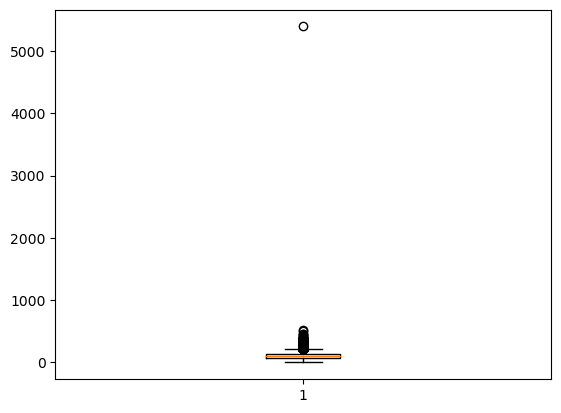

In [15]:
# average daily rate (adr)
plt.boxplot(df['adr'])

In [16]:
df = df[df['adr']<5000]

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2693cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2693e750>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2693c2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d2693fd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d2678bd50>],
 'means': []}

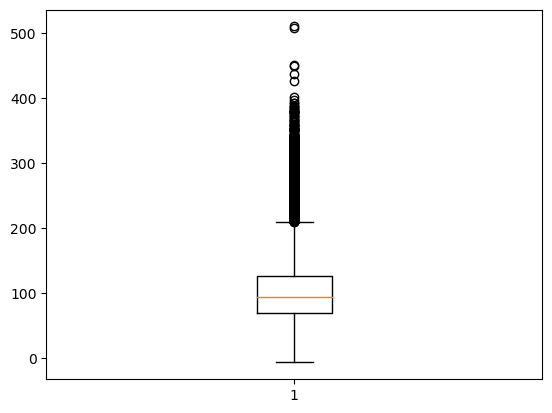

In [17]:
plt.boxplot(df['adr'])

## Data Analysis and Visulizations

In [18]:
canceled_pre = df['is_canceled'].value_counts(normalize= True) 
canceled_pre

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

Text(0, 0.5, 'Proportion')

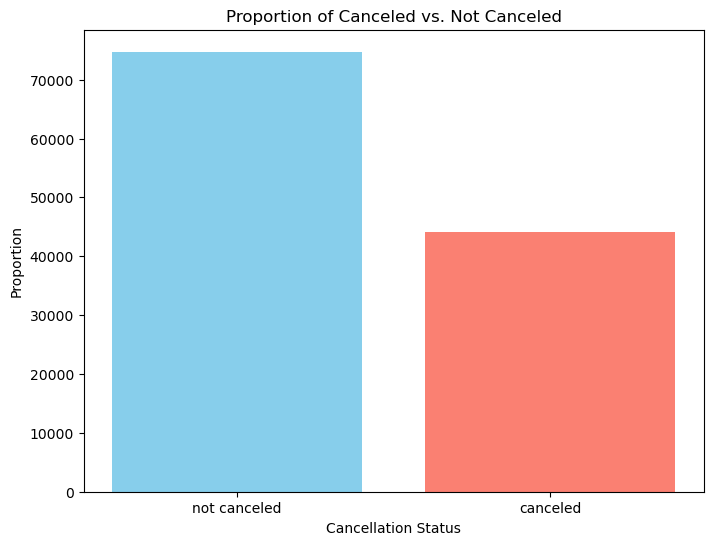

In [19]:
value_counts = df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(['not canceled','canceled'], value_counts.values, color=['skyblue', 'salmon'])
plt.title('Proportion of Canceled vs. Not Canceled')
plt.xlabel('Cancellation Status')
plt.ylabel('Proportion')

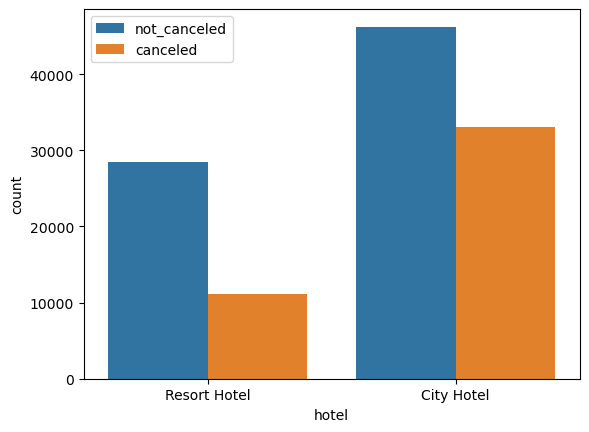

In [20]:
# plt.figure(figsize=(8,4))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['not_canceled', 'canceled'])

In [21]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [22]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [23]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [24]:
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


In [25]:
resort_hotel.values

array([[  0.        ],
       [ 61.96666667],
       [  9.63375   ],
       [  0.        ],
       [ 37.30120879],
       [116.56833333],
       [244.        ],
       [ 66.        ],
       [ 50.        ],
       [ 79.74      ],
       [155.8325    ],
       [134.        ],
       [199.        ],
       [165.        ],
       [126.21333333],
       [119.7       ],
       [ 99.        ],
       [ 58.95      ],
       [ 93.6       ],
       [130.9       ],
       [108.175     ],
       [  8.        ],
       [108.33      ],
       [ 47.77702703],
       [ 47.475     ],
       [132.8       ],
       [ 77.175     ],
       [117.5       ],
       [110.7       ],
       [134.        ],
       [136.0025    ],
       [172.        ],
       [198.66666667],
       [ 98.125     ],
       [119.7       ],
       [114.        ],
       [ 78.8125    ],
       [ 89.2       ],
       [ 61.63      ],
       [ 96.78571429],
       [ 91.83      ],
       [197.        ],
       [ 78.57      ],
       [119

In [26]:
resort_hotel['adr']

reservation_status_date
2014-11-18      0.000000
2015-01-01     61.966667
2015-01-02      9.633750
2015-01-18      0.000000
2015-01-21     37.301209
                 ...    
2017-09-08    101.012500
2017-09-09    147.778333
2017-09-10    145.272500
2017-09-12    153.570000
2017-09-14    105.930000
Name: adr, Length: 913, dtype: float64

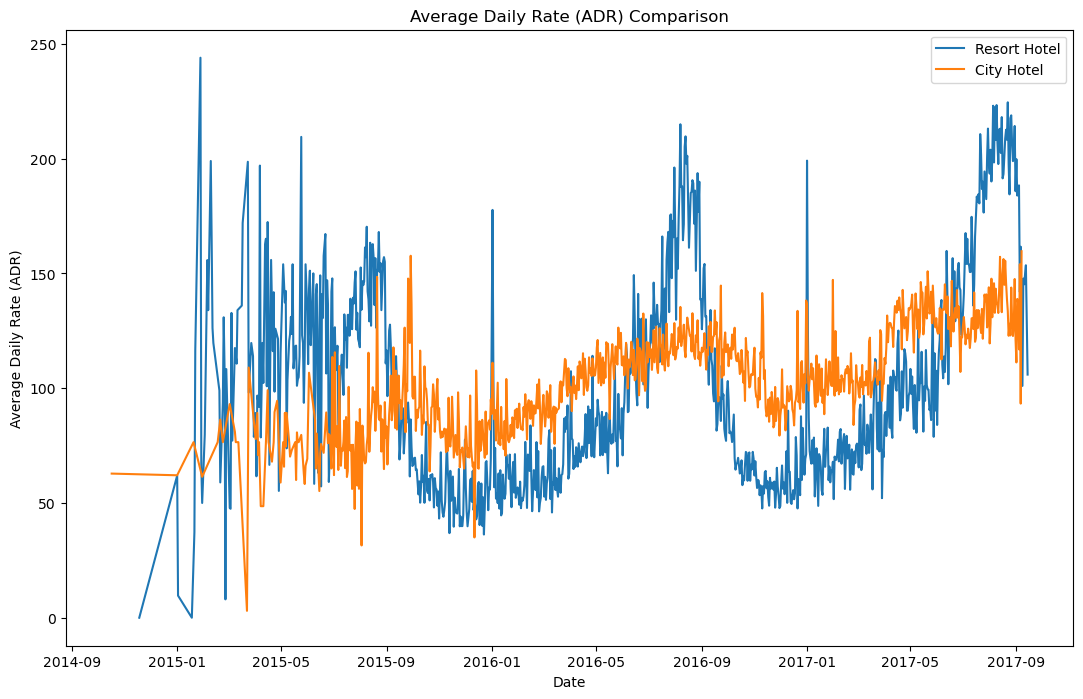

In [27]:
# average daily rate (adr)

plt.figure(figsize=(13,8))

# Plot for Resort Hotel
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')

# Plot for City Hotel
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')

# Adding titles and labels
plt.title('Average Daily Rate (ADR) Comparison')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
# Adding a legend to the plot
plt.legend()
plt.show()


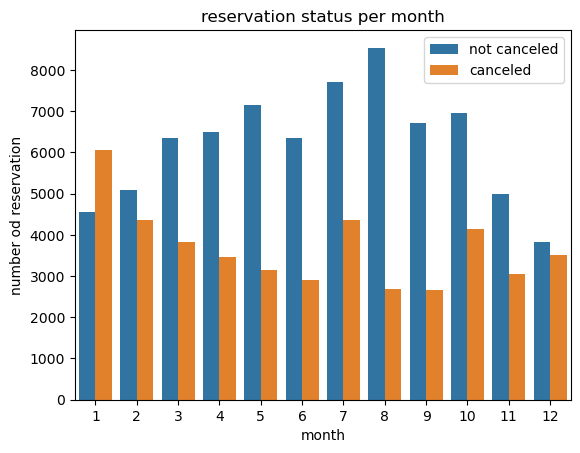

In [28]:
df['month'] = df['reservation_status_date'].dt.month
sns.countplot(x = 'month' , hue='is_canceled', data=df)
plt.title('reservation status per month')
plt.xlabel('month')
plt.ylabel('number od reservation')
plt.legend(['not canceled', 'canceled'])

<Axes: title={'center': 'ADR per maonth'}, xlabel='month', ylabel='adr'>

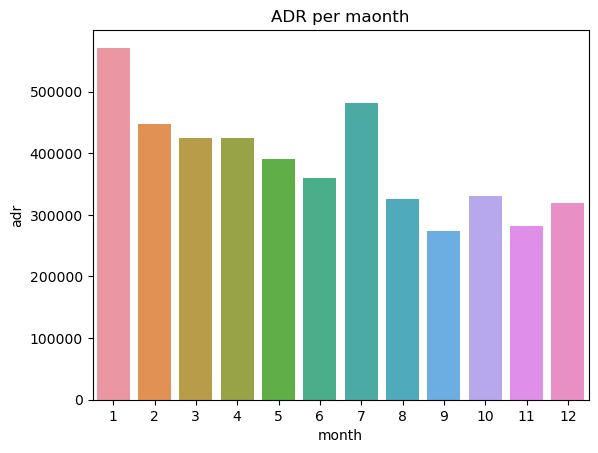

In [29]:
plt.title('ADR per maonth')
data_to_plot = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month', y='adr', data=data_to_plot)


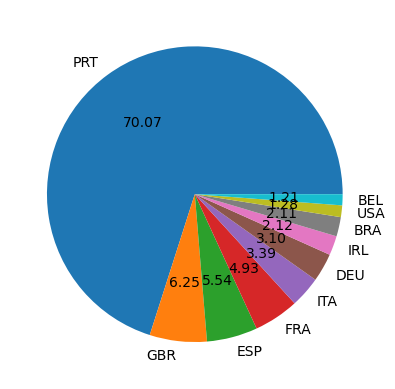

In [30]:
canceled_data = df[df['is_canceled']==1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.pie(top_10_country, autopct='%.2f', labels= top_10_country.index)
plt.show()

In [31]:
top_10_country

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64